In [30]:
import pandas as pd

pileup = pd.read_csv('CLIP-let7g-gene.pileup', sep='\t', names=['chrom', 'pos', '_ref', 'count', 'basereads', 'quals'])

In [32]:
import re
toremove = re.compile('[<>$*#^]')
pileup['matches'] = pileup['basereads'].apply(lambda x: toremove.sub('', x))

In [8]:
import numpy as np
import ssl

In [9]:
# Shannon entropy function
from typing import List

def shannon_entropy(counts_row: pd.Series) -> float:
    freqs = counts_row / counts_row.sum()
    freqs = freqs[freqs > 0]
    return -np.sum(freqs * np.log2(freqs))

In [10]:
def make_entropy_bedgraph(
    matches: str,
    chrom: str,
    abs_start: int,
    out_file: str
) -> None:
    """
    Generate a Shannon entropy bedGraph file from a matches string.

    Parameters:
    - matches: sequence of bases (e.g., from pileup['matches'])
    - chrom: chromosome name (e.g., 'chr9')
    - abs_start: absolute genome coordinate of the first base
    - out_file: path to the output bedGraph file
    """
    # 1) Base counts by position
    bases = list(matches)
    df = pd.DataFrame({'base': bases})
    df['pos'] = np.arange(len(df))
    counts = df.groupby(['pos', 'base']).size().unstack(fill_value=0)

    # 2) Calculate Shannon entropy per position
    entropy = counts.apply(shannon_entropy, axis=1)

    # 3) Build bedGraph DataFrame
    bedgraph = pd.DataFrame({
        'chrom': chrom,
        'start': abs_start + entropy.index,
        'end':   abs_start + entropy.index + 1,
        'value': entropy.values
    })

    # 4) Write to file without header or index
    bedgraph.to_csv(
        out_file,
        sep='\t',
        header=False,
        index=False
    )
    print(f"BedGraph written to {out_file}")


In [11]:
# Mirlet7g
seq_let7g = pileup[pileup['pos'] == 106056094].iloc[0]['matches']
make_entropy_bedgraph(seq_let7g, 'chr9', 106056039, 'let7g_entropy.bedgraph')

BedGraph written to let7g_entropy.bedgraph


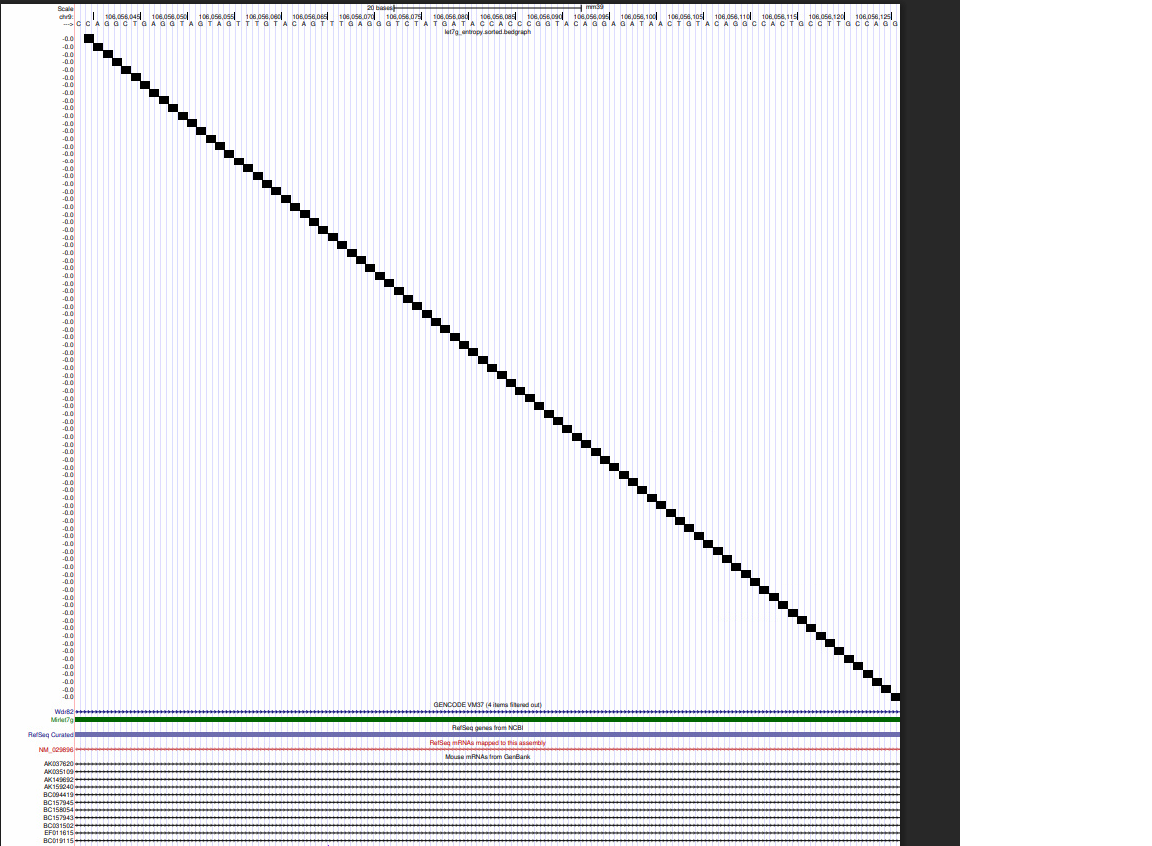

### Mirlet7d

In [34]:
!grep -i mirlet7d ../binfo1-datapack1/gencode.gtf

chr13	ENSEMBL	gene	48689488	48689590	.	-	.	gene_id "ENSMUSG00000065453.3"; gene_type "miRNA"; gene_name "Mirlet7d"; level 3; mgi_id "MGI:2676796";
chr13	ENSEMBL	transcript	48689488	48689590	.	-	.	gene_id "ENSMUSG00000065453.3"; transcript_id "ENSMUST00000083519.3"; gene_type "miRNA"; gene_name "Mirlet7d"; transcript_type "miRNA"; transcript_name "Mirlet7d-201"; level 3; transcript_support_level "NA"; mgi_id "MGI:2676796"; tag "basic";
chr13	ENSEMBL	exon	48689488	48689590	.	-	.	gene_id "ENSMUSG00000065453.3"; transcript_id "ENSMUST00000083519.3"; gene_type "miRNA"; gene_name "Mirlet7d"; transcript_type "miRNA"; transcript_name "Mirlet7d-201"; exon_number 1; exon_id "ENSMUSE00000522678.2"; level 3; transcript_support_level "NA"; mgi_id "MGI:2676796"; tag "basic";


In [48]:
!grep -i mirlet7g ../binfo1-datapack1/gencode.gtf

chr9	ENSEMBL	gene	106056039	106056126	.	+	.	gene_id "ENSMUSG00000065440.3"; gene_type "miRNA"; gene_name "Mirlet7g"; level 3; mgi_id "MGI:2676800";
chr9	ENSEMBL	transcript	106056039	106056126	.	+	.	gene_id "ENSMUSG00000065440.3"; transcript_id "ENSMUST00000083506.3"; gene_type "miRNA"; gene_name "Mirlet7g"; transcript_type "miRNA"; transcript_name "Mirlet7g-201"; level 3; transcript_support_level "NA"; mgi_id "MGI:2676800"; tag "basic";
chr9	ENSEMBL	exon	106056039	106056126	.	+	.	gene_id "ENSMUSG00000065440.3"; transcript_id "ENSMUST00000083506.3"; gene_type "miRNA"; gene_name "Mirlet7g"; transcript_type "miRNA"; transcript_name "Mirlet7g-201"; exon_number 1; exon_id "ENSMUSE00000522665.2"; level 3; transcript_support_level "NA"; mgi_id "MGI:2676800"; tag "basic";


In [35]:
!samtools view -b -o CLIP-let7d.bam ../binfo1-datapack1/CLIP-35L33G.bam chr13:48689488-48689590
!samtools view CLIP-let7d.bam | wc -l

187


In [36]:
!samtools mpileup CLIP-let7d.bam > CLIP-let7d.pileup
!wc -l CLIP-let7d.pileup

[mpileup] 1 samples in 1 input files
87 CLIP-let7d.pileup


In [37]:
!head CLIP-let7d.pileup

chr13	48689488	N	24	^Ga^Ia^Ha^Ia^Ha^Ia^Ia^Ia^Ga^Ia^Ia^Ia^Ia^Ia^Ha^Ia^Ga^Ga^Ga^Ia^Ea^Da^Ha^Ga	BIHGGIHIEIIIGIHIGEGH5BDD
chr13	48689489	N	53	aaaaaaaaaaaaaaaaaaaaaaaaa^Ia^Ha^Ia^Ga^Ga^Ha^Ia^Ia^Ga^Ga^Ia^Ia^Ha^Ia^Ia^Ha^Ha^Da^Ia^Ha^Ia^Ia^Ia^Ia^Ia^Ha^Ga^Ga	GIHIGIIIEIIIIIHIG>EB4@5HDIHIBEGIID?IIGII@H>IGHIIIGHDC
chr13	48689490	N	69	ttttttttttttttttttttttttttttttttttttttttttttttttttttt^Gt^Gt^Ht^Gt^It^It^Ht^It^Gt^Gt^Ht^It^It^It^Ht^It	GIHIGHIFFIIIIIFHGEDG;2>FDIHIDGBIIDBIIDIIAH>IBGIIIGHBG=BG=IIGIDGHFIIHI
chr13	48689491	N	105	aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa^Ia^Ia^Ha^Ga^Ia^Ga^Ia^Ga^Ha^Ha^Ha^Ga^Ia^Ha^Ha^Ia^@a^Ia^Ia^Ia^Ga^Ha^Ha^Ga^Ha^Ga^Ia^Ha^Ga^Ia^Ga^Ha^Ga^Ia^Ia^Ga	EIGHEHHIEIIIIIHIGCBH:?>HGGHI>GBIIGBIIGIHBB;IHIIIIGHDC3=G:IGGIDEHIFIGHII=GIDHEGHHEIGGI7III9=HGBAIGBIGFG>I2
chr13	48689492	N	105	aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa	GIGIEIEI7IIIGIGIG;?F:D@G7GHIAGAIIG3IIGIHDB2IHIIIIDDGC1<GCIIHIGCHIIIEIIIGCI

In [43]:
!awk '$2 >= 48689488 && $2 <= 48689590 { print $0; }' CLIP-let7d.pileup > CLIP-let7d-gene.pileup
!head CLIP-let7d-gene.pileup

chr13	48689488	N	24	^Ga^Ia^Ha^Ia^Ha^Ia^Ia^Ia^Ga^Ia^Ia^Ia^Ia^Ia^Ha^Ia^Ga^Ga^Ga^Ia^Ea^Da^Ha^Ga	BIHGGIHIEIIIGIHIGEGH5BDD
chr13	48689489	N	53	aaaaaaaaaaaaaaaaaaaaaaaaa^Ia^Ha^Ia^Ga^Ga^Ha^Ia^Ia^Ga^Ga^Ia^Ia^Ha^Ia^Ia^Ha^Ha^Da^Ia^Ha^Ia^Ia^Ia^Ia^Ia^Ha^Ga^Ga	GIHIGIIIEIIIIIHIG>EB4@5HDIHIBEGIID?IIGII@H>IGHIIIGHDC
chr13	48689490	N	69	ttttttttttttttttttttttttttttttttttttttttttttttttttttt^Gt^Gt^Ht^Gt^It^It^Ht^It^Gt^Gt^Ht^It^It^It^Ht^It	GIHIGHIFFIIIIIFHGEDG;2>FDIHIDGBIIDBIIDIIAH>IBGIIIGHBG=BG=IIGIDGHFIIHI
chr13	48689491	N	105	aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa^Ia^Ia^Ha^Ga^Ia^Ga^Ia^Ga^Ha^Ha^Ha^Ga^Ia^Ha^Ha^Ia^@a^Ia^Ia^Ia^Ga^Ha^Ha^Ga^Ha^Ga^Ia^Ha^Ga^Ia^Ga^Ha^Ga^Ia^Ia^Ga	EIGHEHHIEIIIIIHIGCBH:?>HGGHI>GBIIGBIIGIHBB;IHIIIIGHDC3=G:IGGIDEHIFIGHII=GIDHEGHHEIGGI7III9=HGBAIGBIGFG>I2
chr13	48689492	N	105	aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa	GIGIEIEI7IIIGIGIG;?F:D@G7GHIAGAIIG3IIGIHDB2IHIIIIDDGC1<GCIIHIGCHIIIEIIIGCI

In [46]:
let7d_pileup = pd.read_csv('CLIP-let7d-gene.pileup', sep='\t', names=['chrom', 'pos', '_ref', 'count', 'basereads', 'quals'])
let7d_pileup['matches'] = let7d_pileup['basereads'].apply(lambda x: toremove.sub('', x))
let7d_pileup[let7d_pileup['pos'] == 48689540].iloc[0]['matches']

'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa'

107 107


chrom                                                  chr13
pos                                                 48689504
matches    aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...
count                                                    187
Name: 16, dtype: object


In [49]:
# Mirlet7d
seq_let7d = let7d_pileup[let7d_pileup['pos'] == 48689540].iloc[0]['matches']
make_entropy_bedgraph(seq_let7d, 'chr9', 48689488, 'let7d_entropy.bedgraph')

BedGraph written to let7d_entropy.bedgraph


In [51]:
!sort -k1,1 -k2,2n let7g_entropy.bedgraph > let7g_entropy.sorted.bedgraph